# Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris_data = pd.read_csv("./Iris.csv", index_col=0)

In [4]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### EDA

- How large is the iris_data?

In [6]:
iris_data.shape

(150, 5)

- So, this is a small data set, still we can draw some amazing insights from it, let's have a look!

- Check for null/missing values

In [7]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- No null values in the data set
- So, no imputation required.

- Categorizing values in the dataset:
    1. Categorical: finite set number of values
    2. Continuous: infinite number of values
    3. Discrete: finite number of values that must be numeric

- Now, lets explore the data.
- Let's look at the relationships between the **target** and between other variables as well.
- Setting the target variable in the below cell.

In [5]:
target = iris_data['Species']

1. relationship between **SepalLengthCm** and **target** using histplot

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Species'>

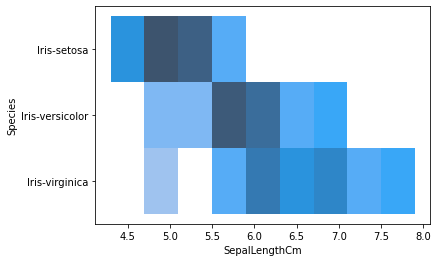

In [15]:
sns.histplot(x=iris_data['SepalLengthCm'], y=target)

- it can be seen from the above plot that *Iris-setosa* is almost classifiable while the rest form an overlapping perspective, when **SepalLengthCm >= 5.5**

2. Relationship between *SepalWidthCm* and *target* variable: using histplot 

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Species'>

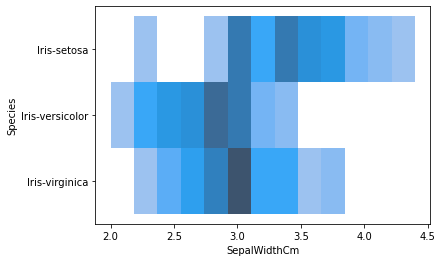

In [14]:
sns.histplot(x=iris_data['SepalWidthCm'], y=target)

- the above plot generates a fuzzy relationship between Species and SepalWidthCm.
- So, this feature may not effect the accuracy of our model much.
- this is because most of the classified region(of all the species) lies in the range of:

    *PetalLengthCm >= 2.7 and PetalLengthCm <= 3.5*

3. Relationship between *PetalLengthCm* and target vairable: using swarmplot

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

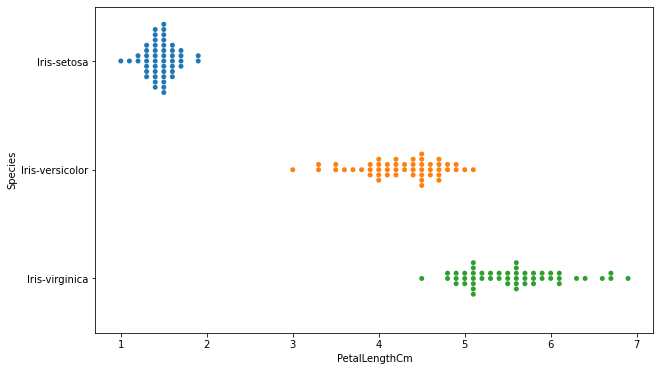

In [19]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=iris_data, x='PetalLengthCm', y=target)

- from the above swarmplot we can see that *Iris-setosa* is easily classifiable when the *PetalLengthCm* is in (0.5, 2).
- So, the *PetalLengthCm* can be an important feature in our model.

4. Relationship between *PetalWidthCm* and *target* variable: using swarmplot

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Species'>

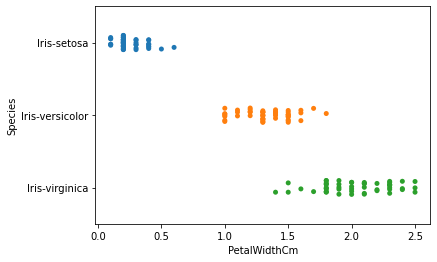

In [26]:
sns.stripplot(x=iris_data['PetalWidthCm'], y=target)

- again the plot can be easily classified for *Iris-setosa* but not clear for the rest species.
- in the below I've taken the petal_area(almost) to see it's variation with the target variable, let's see what I get.

<AxesSubplot:ylabel='Species'>

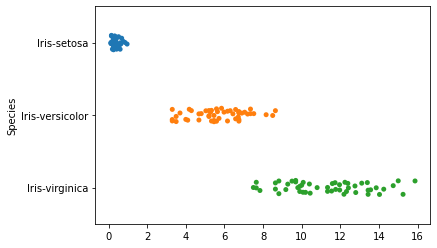

In [27]:
sns.stripplot(x=iris_data['PetalWidthCm']*iris_data['PetalLengthCm'], y=target)

- Now the plot can be used to easily classify between almost all the three species.
- for *Iris-setosa* the petal_area is in range (0, 1)
- for *Iris-versicolor* the petal_area is in range (3, 8.5)
- for *Iris-virginica* the petal_area is in range (7.5, 16)
SO, there is really a small portion in the intersection of the above two species i.e: *Iris-versicolor* and *Iris-virginica*, which actually favours our classification!
#### Conclusion from the above plot:
We can design a new feature named: **PetalArea**, which can play an important role towards a good model.